# Business Understanding
1. Tujuan alalisis ini adalah untuk Memprediksi STATUS KELULUSAN (status kelulusan) mahasiswa berdasarkan informasi IPS dari semester 1 hingga IPS semester 8
2. Pertanyaan Kunci: Apa faktor yang mempengaruhi kelulusan tepat waktu? Seberapa akurat kita dapat memprediksi status kelulusan?

In [409]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Data Understanding
1. Dataset ini mencakup kolom NAMA MAHASISWA, JENIS KELAMIN, STATUS MAHASISWA, UMUR, STATUS NIKAH, IPS 1 hingga IPS 8, IPK, dan STATUS KELULUSAN.
2. Eksplorasi Data untuk memahami distribusi data, mengidentifikasi nilai yang hilang, dan mendeteksi outlier.

In [410]:
# Membaca file Excel
train_df = pd.read_excel('kelulusan_train.xls')
train_df

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,TERLAMBAT
1,DWI HESTYNA PRIHASTANTY,PEREMPUAN,MAHASISWA,32,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,TERLAMBAT
2,MURYA ARIEF BASUKI,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,TERLAMBAT
3,NANIK SUSANTI,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,TERLAMBAT
4,RIFKA ISTIQFARINA,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,TERLAMBAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,ARY JULI SETIYANTO,LAKI - LAKI,MAHASISWA,23,BELUM MENIKAH,1.98,2.50,2.14,2.77,2.61,2.93,2.82,2.5,0.99,TEPAT
375,RINA ZAHROTUL UMAMI,PEREMPUAN,BEKERJA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0,2.97,TEPAT
376,TULISA WAHYUHADI KRISNATAMI,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0,3.03,TEPAT
377,NI'MATUL JANNAH,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,3.02,2.94,3.25,2.87,3.00,2.94,3.09,3.0,3.16,TEPAT


In [411]:
test_df = pd.read_excel('kelulusan_test.xls')
test_df

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,UNAMA,LAKI - LAKI,MAHASISWA,24,BELUM MENIKAH,3.17,2.70,3.23,2.41,3.00,2.47,1.75,0.00,2.75,TEPAT
1,LEYLA TRIYANA PRATIWI,PEREMPUAN,MAHASISWA,26,BELUM MENIKAH,3.60,3.50,3.42,2.85,3.31,2.95,2.18,NaN,3.39,TEPAT
2,VERIS SOFIYAN PRAYOGA,LAKI - LAKI,MAHASISWA,29,BELUM MENIKAH,2.67,2.66,2.93,3.14,2.92,2.64,2.88,0.50,2.81,TEPAT
3,ADITYA AKBAR NUGRAHA,LAKI - LAKI,MAHASISWA,27,BELUM MENIKAH,2.48,2.86,2.09,2.55,2.55,2.43,2.55,2.17,2.82,TEPAT
4,ERNA EKA RIYANTI,PEREMPUAN,MAHASISWA,25,BELUM MENIKAH,3.19,3.08,3.31,2.83,3.36,2.73,3.06,0.00,3.09,TEPAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,ARY JULI SETIYANTO,LAKI - LAKI,MAHASISWA,23,BELUM MENIKAH,1.98,2.50,2.14,2.77,2.61,2.93,2.82,2.50,0.99,TEPAT
141,RINA ZAHROTUL UMAMI,PEREMPUAN,BEKERJA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.00,2.97,TEPAT
142,TULISA WAHYUHADI KRISNATAMI,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.00,3.03,TEPAT
143,NI'MATUL JANNAH,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,3.02,2.94,3.25,2.87,3.00,2.94,3.09,3.00,3.16,TEPAT


# Data Preparation
1. Pembersihan Data: Menangani nilai yang hilang, mengganti 0.0 pada kolom IPS jika perlu, dan melakukan encoding pada variabel kategorikal.
2. Pemilihan Fitur: Memilih fitur yang relevan (JENIS KELAMIN, UMUR, IPS 1 hingga IPS 8, STATUS MAHASISWA, STATUS NIKAH).

In [412]:
# Menghapus kolom 'NAMA' di kedua dataset
train_df = train_df.drop(columns=['NAMA'])
test_df = test_df.drop(columns=['NAMA'])

In [413]:
train_df.isnull().sum()

JENIS KELAMIN       0
STATUS MAHASISWA    0
UMUR                0
STATUS NIKAH        0
IPS 1               0
IPS 2               0
IPS 3               0
IPS 4               0
IPS 5               0
IPS 6               0
IPS 7               0
IPS 8               7
IPK                 3
STATUS KELULUSAN    0
dtype: int64

In [414]:
test_df.isnull().sum()

JENIS KELAMIN       0
STATUS MAHASISWA    0
UMUR                0
STATUS NIKAH        0
IPS 1               0
IPS 2               0
IPS 3               0
IPS 4               0
IPS 5               0
IPS 6               0
IPS 7               0
IPS 8               4
IPK                 3
STATUS KELULUSAN    0
dtype: int64

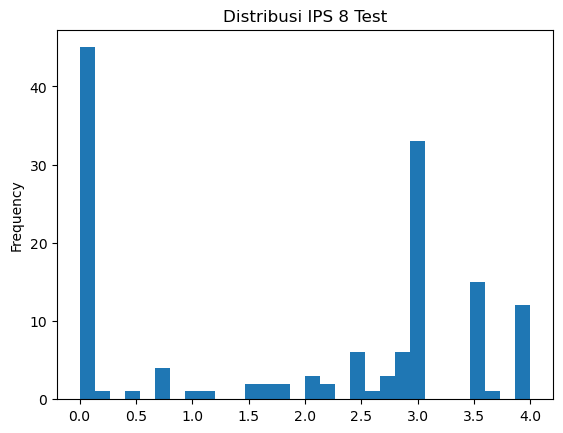

In [415]:
# Melihat distribusi nilai
#Pada Kolom IPS 8 dalam test_df
import matplotlib.pyplot as plt

# Visualisasi distribusi data
test_df['IPS 8'].plot(kind='hist', bins=30)
plt.title('Distribusi IPS 8 Test')
plt.show()

Karena IPS ini distribusinya tidak normal, maka kita akan menggunakan median untuk mengisi nilai yang hilang

In [416]:
test_df['IPS 8'].fillna(test_df['IPS 8'].median(), inplace=True)

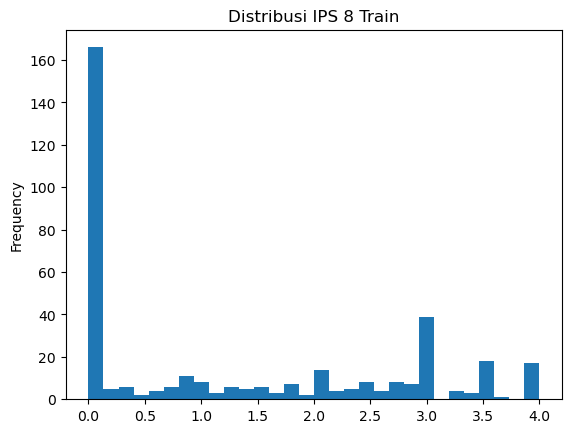

In [417]:
#Pada Kolom IPS 8 dalam train_df
import matplotlib.pyplot as plt

# Visualisasi distribusi data
train_df['IPS 8'].plot(kind='hist', bins=30)
plt.title('Distribusi IPS 8 Train')
plt.show()

In [418]:
train_df['IPS 8'].fillna(train_df['IPS 8'].median(), inplace=True)

*Menangani nilai IPK*

In [419]:
# Menghapus spasi ekstra dari nama kolom
test_df.columns = test_df.columns.str.strip()

# Memeriksa kembali kolom yang ada
print(test_df.columns)

Index(['JENIS KELAMIN', 'STATUS MAHASISWA', 'UMUR', 'STATUS NIKAH', 'IPS 1',
       'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8', 'IPK',
       'STATUS KELULUSAN'],
      dtype='object')


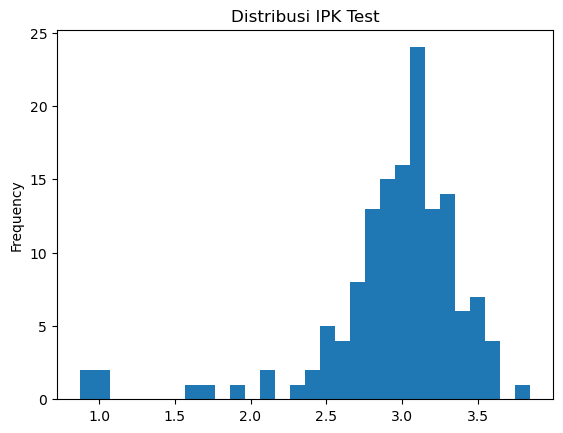

In [420]:
#Pada Kolom IPK dalam test_df
import matplotlib.pyplot as plt

# Visualisasi distribusi data
test_df['IPK'].plot(kind='hist', bins=30)
plt.title('Distribusi IPK Test')
plt.show()

In [421]:
# Menghapus spasi ekstra dari nama kolom
train_df.columns = train_df.columns.str.strip()

# Memeriksa kembali kolom yang ada
print(train_df.columns)

Index(['JENIS KELAMIN', 'STATUS MAHASISWA', 'UMUR', 'STATUS NIKAH', 'IPS 1',
       'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8', 'IPK',
       'STATUS KELULUSAN'],
      dtype='object')


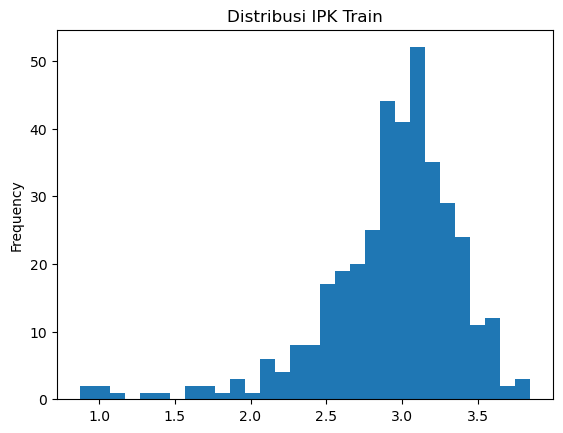

In [422]:
#Pada Kolom IPK dalam train_df
import matplotlib.pyplot as plt

# Visualisasi distribusi data
train_df['IPK'].plot(kind='hist', bins=30)
plt.title('Distribusi IPK Train')
plt.show()

In [423]:
import numpy as np
# Menghitung nilai IPK
test_df['IPK'] = test_df[['IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8']].replace(0, np.nan).mean(axis=1)
train_df['IPK'] = train_df[['IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8']].replace(0, np.nan).mean(axis=1)

In [424]:
test_df.head()

,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,LAKI - LAKI,MAHASISWA,24,BELUM MENIKAH,3.17,2.70,3.23,2.41,3.00,2.47,1.75,0.00,2.675714,TEPAT
1,PEREMPUAN,MAHASISWA,26,BELUM MENIKAH,3.60,3.50,3.42,2.85,3.31,2.95,2.18,2.60,3.051250,TEPAT
2,LAKI - LAKI,MAHASISWA,29,BELUM MENIKAH,2.67,2.66,2.93,3.14,2.92,2.64,2.88,0.50,2.542500,TEPAT
3,LAKI - LAKI,MAHASISWA,27,BELUM MENIKAH,2.48,2.86,2.09,2.55,2.55,2.43,2.55,2.17,2.460000,TEPAT
4,PEREMPUAN,MAHASISWA,25,BELUM MENIKAH,3.19,3.08,3.31,2.83,3.36,2.73,3.06,0.00,3.080000,TEPAT


In [425]:
train_df.head()

,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,2.991429,TERLAMBAT
1,PEREMPUAN,MAHASISWA,32,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.114286,TERLAMBAT
2,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.538571,TERLAMBAT
3,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.445714,TERLAMBAT
4,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.000000,TERLAMBAT


#Mengeksplorasi Nilai 0.0 pada beberapa kolom


Jumlah Mahasiswa dengan IPS 0.0 berdasarkan Status Kelulusan:
STATUS KELULUSAN
TEPAT        42
TERLAMBAT     2
Name: count, dtype: int64


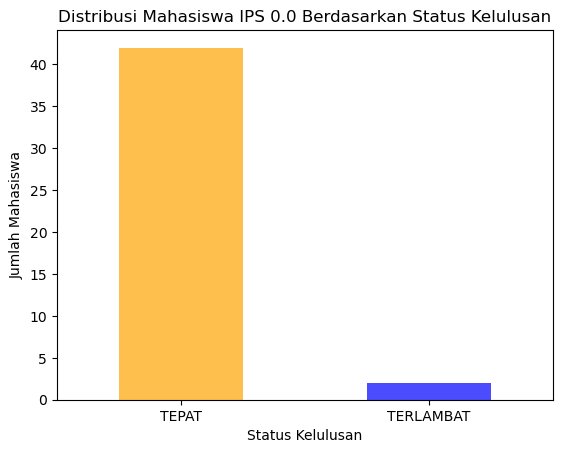

In [426]:
# Filter test_df dengan IPS = 0.0
ips_0 = test_df[test_df['IPS 8'] == 0.0]

# Hitung jumlah mahasiswa berdasarkan status kelulusan
jumlah_per_status = ips_0['STATUS KELULUSAN'].value_counts()

# Print hasil
print("Jumlah Mahasiswa dengan IPS 0.0 berdasarkan Status Kelulusan:")
print(jumlah_per_status)

# Visualisasi (opsional)
import matplotlib.pyplot as plt

jumlah_per_status.plot(kind='bar', color=['orange', 'blue'], alpha=0.7)
plt.title('Distribusi Mahasiswa IPS 0.0 Berdasarkan Status Kelulusan')
plt.xlabel('Status Kelulusan')
plt.ylabel('Jumlah Mahasiswa')
plt.xticks(rotation=0)
plt.show()


Jumlah Mahasiswa dengan IPS 0.0 berdasarkan Status Kelulusan:
STATUS KELULUSAN
TEPAT        95
TERLAMBAT    69
Name: count, dtype: int64


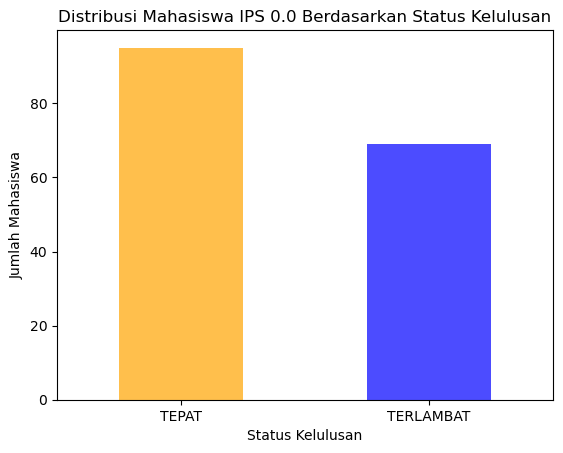

In [427]:
# Filter train_df dengan IPS = 0.0
ips_0 = train_df[train_df['IPS 8'] == 0.0]

# Hitung jumlah mahasiswa berdasarkan status kelulusan
jumlah_per_status = ips_0['STATUS KELULUSAN'].value_counts()

# Print hasil
print("Jumlah Mahasiswa dengan IPS 0.0 berdasarkan Status Kelulusan:")
print(jumlah_per_status)

# Visualisasi (opsional)
import matplotlib.pyplot as plt

jumlah_per_status.plot(kind='bar', color=['orange', 'blue'], alpha=0.7)
plt.title('Distribusi Mahasiswa IPS 0.0 Berdasarkan Status Kelulusan')
plt.xlabel('Status Kelulusan')
plt.ylabel('Jumlah Mahasiswa')
plt.xticks(rotation=0)
plt.show()


Dari hasil ini Secara logis, mahasiswa yang lulus tepat waktu di semester 7, seharusnya tidak memiliki nilai di semester 8 karena mereka sudah selesai menyelesaikan seluruh mata kuliah yang dibutuhkan. Jadi, nilai 0.0 pada semester 8 seharusnya dianggap tidak valid atau mencurigakan, terutama jika ini terjadi pada mahasiswa yang sudah menyelesaikan studi mereka. Akan tetapi ada beberapa alas an untuk membiarkan 0.0 ini tetap harus dicantumkan didasarkan pada beberapa alasan yang mendukung keaslian data dan analisis yang lebih realistis. Pertama, nilai 0.0 tersebut bisa mencerminkan kenyataan yang terjadi di lapangan, seperti adanya kesalahan input atau kebijakan sistem yang memberikan nilai 0.0 secara otomatis kepada mahasiswa yang sudah lulus, tetapi tidak terdaftar dalam mata kuliah pada semester 8. Dengan membiarkan nilai 0.0, kita dapat mempertahankan keaslian data dan melihat pola asli yang ada, tanpa mengubah distribusi data yang mungkin penting untuk analisis lebih lanjut. Kedua, menghapus atau mengganti nilai 0.0 bisa memperkenalkan bias dalam analisis, yang berpotensi mengubah sifat data yang sesungguhnya dan memengaruhi hasil model. Selain itu, nilai 0.0 tersebut mungkin memiliki relevansi dalam konteks akademik atau administratif, seperti menunjukkan bahwa mahasiswa tidak mengikuti mata kuliah pada semester 8, meskipun mereka telah lulus. Setiap institusi pendidikan memiliki kebijakan administratif yang berbeda, dan sistem kampus bisa memberikan nilai 0.0 secara otomatis meskipun mahasiswa sudah lulus. Oleh karena itu, membiarkan nilai 0.0 tetap ada dalam dataset memungkinkan analisis yang lebih mendalam dan menghindari penghilangan informasi penting yang mungkin tersembunyi dalam data tersebut.

In [428]:
from sklearn.preprocessing import LabelEncoder

# Daftar kolom yang akan di-encode
columns_to_encode = ['JENIS KELAMIN', 'STATUS MAHASISWA', 'STATUS NIKAH', 'STATUS KELULUSAN']

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Proses encoding untuk setiap kolom
for col in columns_to_encode:
    train_df[col] = label_encoder.fit_transform(train_df[col])
    test_df[col] = label_encoder.transform(test_df[col])

In [429]:
test_df

,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,0,1,24,0,3.17,2.70,3.23,2.41,3.00,2.47,1.75,0.00,2.675714,0
1,1,1,26,0,3.60,3.50,3.42,2.85,3.31,2.95,2.18,2.60,3.051250,0
2,0,1,29,0,2.67,2.66,2.93,3.14,2.92,2.64,2.88,0.50,2.542500,0
3,0,1,27,0,2.48,2.86,2.09,2.55,2.55,2.43,2.55,2.17,2.460000,0
4,1,1,25,0,3.19,3.08,3.31,2.83,3.36,2.73,3.06,0.00,3.080000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,0,1,23,0,1.98,2.50,2.14,2.77,2.61,2.93,2.82,2.50,2.531250,0
141,1,0,23,0,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.00,2.870000,0
142,1,1,23,0,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.00,2.870000,0
143,1,1,23,0,3.02,2.94,3.25,2.87,3.00,2.94,3.09,3.00,3.013750,0


In [430]:
train_df

,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,1,0,28,0,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,2.991429,1
1,1,1,32,0,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.114286,1
2,1,0,29,0,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.538571,1
3,1,1,27,0,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.445714,1
4,1,0,29,0,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,0,1,23,0,1.98,2.50,2.14,2.77,2.61,2.93,2.82,2.5,2.531250,0
375,1,0,23,0,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0,2.870000,0
376,1,1,23,0,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0,2.870000,0
377,1,1,23,0,3.02,2.94,3.25,2.87,3.00,2.94,3.09,3.0,3.013750,0


In [431]:
#Import the SMinMaxscaler class
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= train_df[['UMUR', 'IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8','IPK']] = scaler.fit_transform(train_df[['UMUR', 'IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8','IPK']])
print(X_train)

[[0.21428571 0.70231214 0.66473988 ... 0.77493606 0.         0.73469388]
 [0.35714286 0.7716763  0.80924855 ... 0.83120205 0.         0.77316187]
 [0.25       0.91618497 0.80924855 ... 0.95396419 0.         0.90601062]
 ...
 [0.03571429 0.69653179 0.65028902 ... 0.80306905 0.75       0.69667319]
 [0.03571429 0.77745665 0.70520231 ... 0.79028133 0.75       0.74168297]
 [0.03571429 0.80057803 0.73988439 ... 0.61636829 0.75       0.72133072]]


In [432]:
#Import the MinMaxscaler class
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_test= test_df[['UMUR', 'IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8','IPK']] = scaler.fit_transform(test_df[['UMUR', 'IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8','IPK']])
print(X_test)

[[0.11111111 0.71875    0.66869301 ... 0.44757033 0.         0.66363212]
 [0.22222222 0.94270833 0.9118541  ... 0.55754476 0.65       0.78635621]
 [0.38888889 0.45833333 0.65653495 ... 0.73657289 0.125      0.62009804]
 ...
 [0.05555556 0.49479167 0.68389058 ... 0.80306905 0.75       0.72712418]
 [0.05555556 0.640625   0.74164134 ... 0.79028133 0.75       0.77410131]
 [0.05555556 0.68229167 0.7781155  ... 0.61636829 0.75       0.75285948]]


In [433]:
# memastikan kolom train dan test sesuai
train_df, test_df = train_df.align(test_df, join='left', axis=1, fill_value=0)

In [434]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [435]:
# Memisahkan fitur dan target untuk data training
X_train = train_df.drop(columns=['STATUS KELULUSAN'])  # Semua kolom kecuali target
y_train = train_df['STATUS KELULUSAN']  # Kolom target saja

# Memisahkan fitur dan target untuk data testing
X_test = test_df.drop(columns=['STATUS KELULUSAN'])  # Semua kolom kecuali target
y_test = test_df['STATUS KELULUSAN']  # Kolom target saja


# Pemodelan
1. Pemilihan Model: Memilih algoritma klasifikasi, pada dataset ini akan digunakan Knn.
2. Pelatihan Model: menggunakan dataset pelatihan dan pengujian, kemudian melatih model.

In [436]:
from sklearn.model_selection import cross_val_score
import numpy as np

k_range = range(1, 21)  # Menguji nilai k dari 1 hingga 20
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(np.mean(scores))

optimal_k = k_range[np.argmax(cv_scores)]  # Menemukan k dengan akurasi tertinggi
print(f"Optimal k: {optimal_k}")


Optimal k: 4


In [437]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=4)

In [438]:
# Prediksi dengan data test
y_pred = knn.predict(X_test)

# Evaluasi model menggunakan akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred))

Accuracy: 0.9586206896551724
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       143
           1       0.17      0.50      0.25         2

    accuracy                           0.96       145
   macro avg       0.58      0.73      0.61       145
weighted avg       0.98      0.96      0.97       145



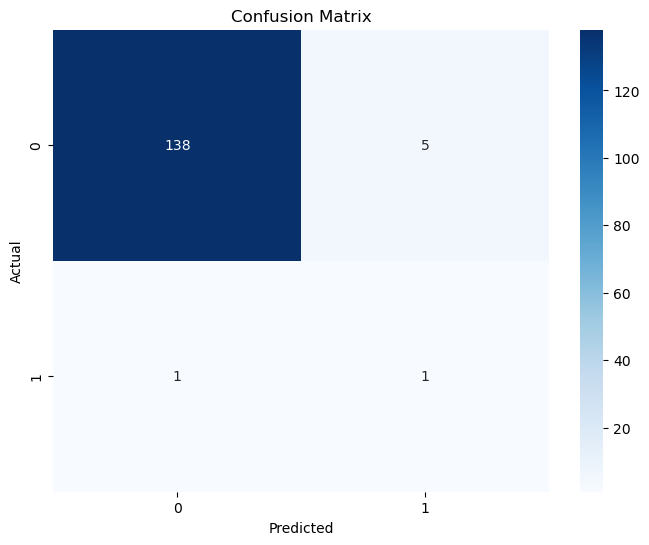

In [439]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
# Melakukan prediksi
y_pred = knn.predict(X_test)

# Menghitung confusion matrix atau mengevaluasi
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0','1'], yticklabels=['0','1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

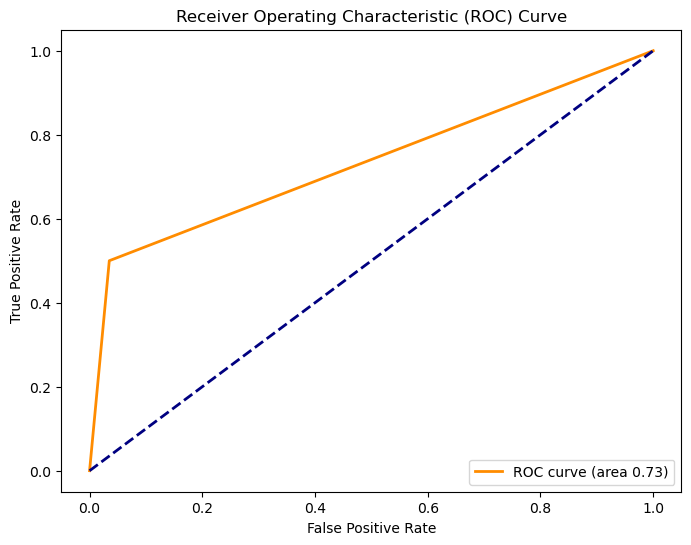

In [440]:
# Menghitung nilai false positive rate (fpr) dan true positive rate (tpr) untuk kurva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Visualisasi kurva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area {:.2f})'.format(roc_auc))
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Evaluasi
Evaluasi Model: Mengevaluasi kinerja model menggunakan metrik seperti akurasi, precision, recall, dan F1-score.

In [441]:
# Evaluasi Model
y_pred = knn.predict(X_test)

# Confusion Matrix dan Classification Report
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Confusion Matrix:
 [[138   5]
 [  1   1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       143
           1       0.17      0.50      0.25         2

    accuracy                           0.96       145
   macro avg       0.58      0.73      0.61       145
weighted avg       0.98      0.96      0.97       145

